In [1]:
%reload_ext autoreload
%autoreload 2
import sys
import numpy as np
import arrow
import torch

from torch.utils.data import DataLoader


sys.path.append('B://workspace/tensorflow')

from src.config.params import Areas, Area
from src.config.params import MODEL_SAVE_PATH
from src.dataset.Argo import Argo3DTemperatureDataset, depthMap

resolution = 2
depth = [0, 5]
offset = 0
start_time = arrow.get('2004-01-01').shift(months=offset)

print(f"start_time: {start_time.format('YYYY-MM-DD')}")


area = Area(title=f"global_profile", lon=[-40, 40], lat=[-40, 40], description="Global")

# area = Areas[0]

# area_blocks = scope()
area_blocks = [Areas[0]]

start_time: 2004-01-01


In [2]:
def train_area(area, pre_model=None):
    
    from src.trainer.unet import UNetTrainer

    trainer = UNetTrainer(
        "UNet 训练器",
        area,
        offset=0,
        resolution=resolution,
        depth=depth,
        epochs=100,
        batch_size=10,
        pre_model=pre_model,
    )

    model = trainer.train()
    
    if pre_model is None:
        torch.save(model, f"{MODEL_SAVE_PATH}/{area.title}.pkl")
    else:
        torch.save(model, f"{MODEL_SAVE_PATH}/{area.title}_new.pkl")
    
    return model
    


In [3]:
def plot_model_prediction(temp_model, area, off):
    from numpy import sqrt, nanmean
    from torch.utils.data import DataLoader
    
    from src.dataset.Argo import Argo3DTemperatureDataset
    from src.plot.sst import plot_sst, plot_sst_diff
    from src.plot.profile import plot_3d_temperature, plot_3d_temperature_comparison

    # sst_model = load(f"{model_path}")

    lon = area.lon
    lat = area.lat
    
    
    o = off or offset

    dataset = Argo3DTemperatureDataset(
        offset=o,
        resolution=resolution,
        lon=lon,
        lat=lat,
        depth=depth
    )
    loader = DataLoader(dataset, batch_size=1, shuffle=False)
    it = iter(loader)

    input_, output = next(it)

    pred = temp_model(input_)
    
    print(f"pred: {pred.shape}, output: {output.shape}")

    pred = pred.detach().numpy()[0, :, :, :]
    output = output.detach().numpy()[0, :, :, :]
    
    depth_range = range(depth[0], depth[1])
    depth_array = depthMap[depth_range]
    
    plot_3d_temperature(pred, area.lon, area.lat, depth_array, step=resolution)
    plot_3d_temperature(output, area.lon, area.lat, depth_array, step=resolution)

    # plot_sst(output, area.lon, area.lat, resolution, area.title, title=f'{area.title} origin')
    # plot_sst(pred, area.lon, area.lat, resolution, area.title, title=f'{area.title} prediction')

    # pred_diff = pred - output
    
    # plot_sst_diff(pred_diff, area.lon, area.lat, resolution, area.title, title=f'{area.title} error')

    # 计算 RMSE
    rmse = sqrt(nanmean((pred - output) ** 2))

    print(f"预测三维海洋温度平均误差: {rmse}")

    # profile, origin_profile, rmses_profile  = predict_rf(rf_model, area, pred, 236)

    # print(f"预测剖面误差: {rmses_profile}")

    # plot_sst_comparison(mean_monthly_sst, pred, area.lon, area.lat, title="2023-10 ERA5")


In [4]:
import os
# 开始训练
start = 0

area_blocks = area_blocks[start:]

for area in area_blocks:
    
    pre_model = None
    
    temp_model = train_area(area, pre_model)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name           | Type       | Params | Mode 
------------------------------------------------------
0 | encoder        | Sequential | 13.1 M | train
1 | depth_expander | Sequential | 42.5 M | train
2 | decoder_3d     | Sequential | 14.8 M | train
------------------------------------------------------
70.4 M    Trainable params
0         Non-trainable params
70.4 M    Total params
281.713   Total estimated model params size (MB)
14        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

b:\workspace\tensorflow\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


b:\workspace\tensorflow\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
b:\workspace\tensorflow\.venv\Lib\site-packages\lightning\pytorch\loops\fit_loop.py:298: The number of training batches (20) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 99: 100%|██████████| 20/20 [00:40<00:00,  0.49it/s, v_num=493, train_loss=118.0]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 20/20 [00:40<00:00,  0.49it/s, v_num=493, train_loss=118.0]
train_output: TrainOutput(epoch=100, val_loss=[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

pred: torch.Size([1, 40, 40, 5]), output: torch.Size([1, 40, 40, 5])
deep d: 0
deep d: 5
deep d: 10
deep d: 20
deep d: 30
deep d: 0
deep d: 5
deep d: 10
deep d: 20
deep d: 30
预测三维海洋温度平均误差: nan


C:\Users\Administrator\AppData\Local\Temp\ipykernel_43352\3591225248.py:50: RuntimeWarning: Mean of empty slice
  rmse = sqrt(nanmean((pred - output) ** 2))


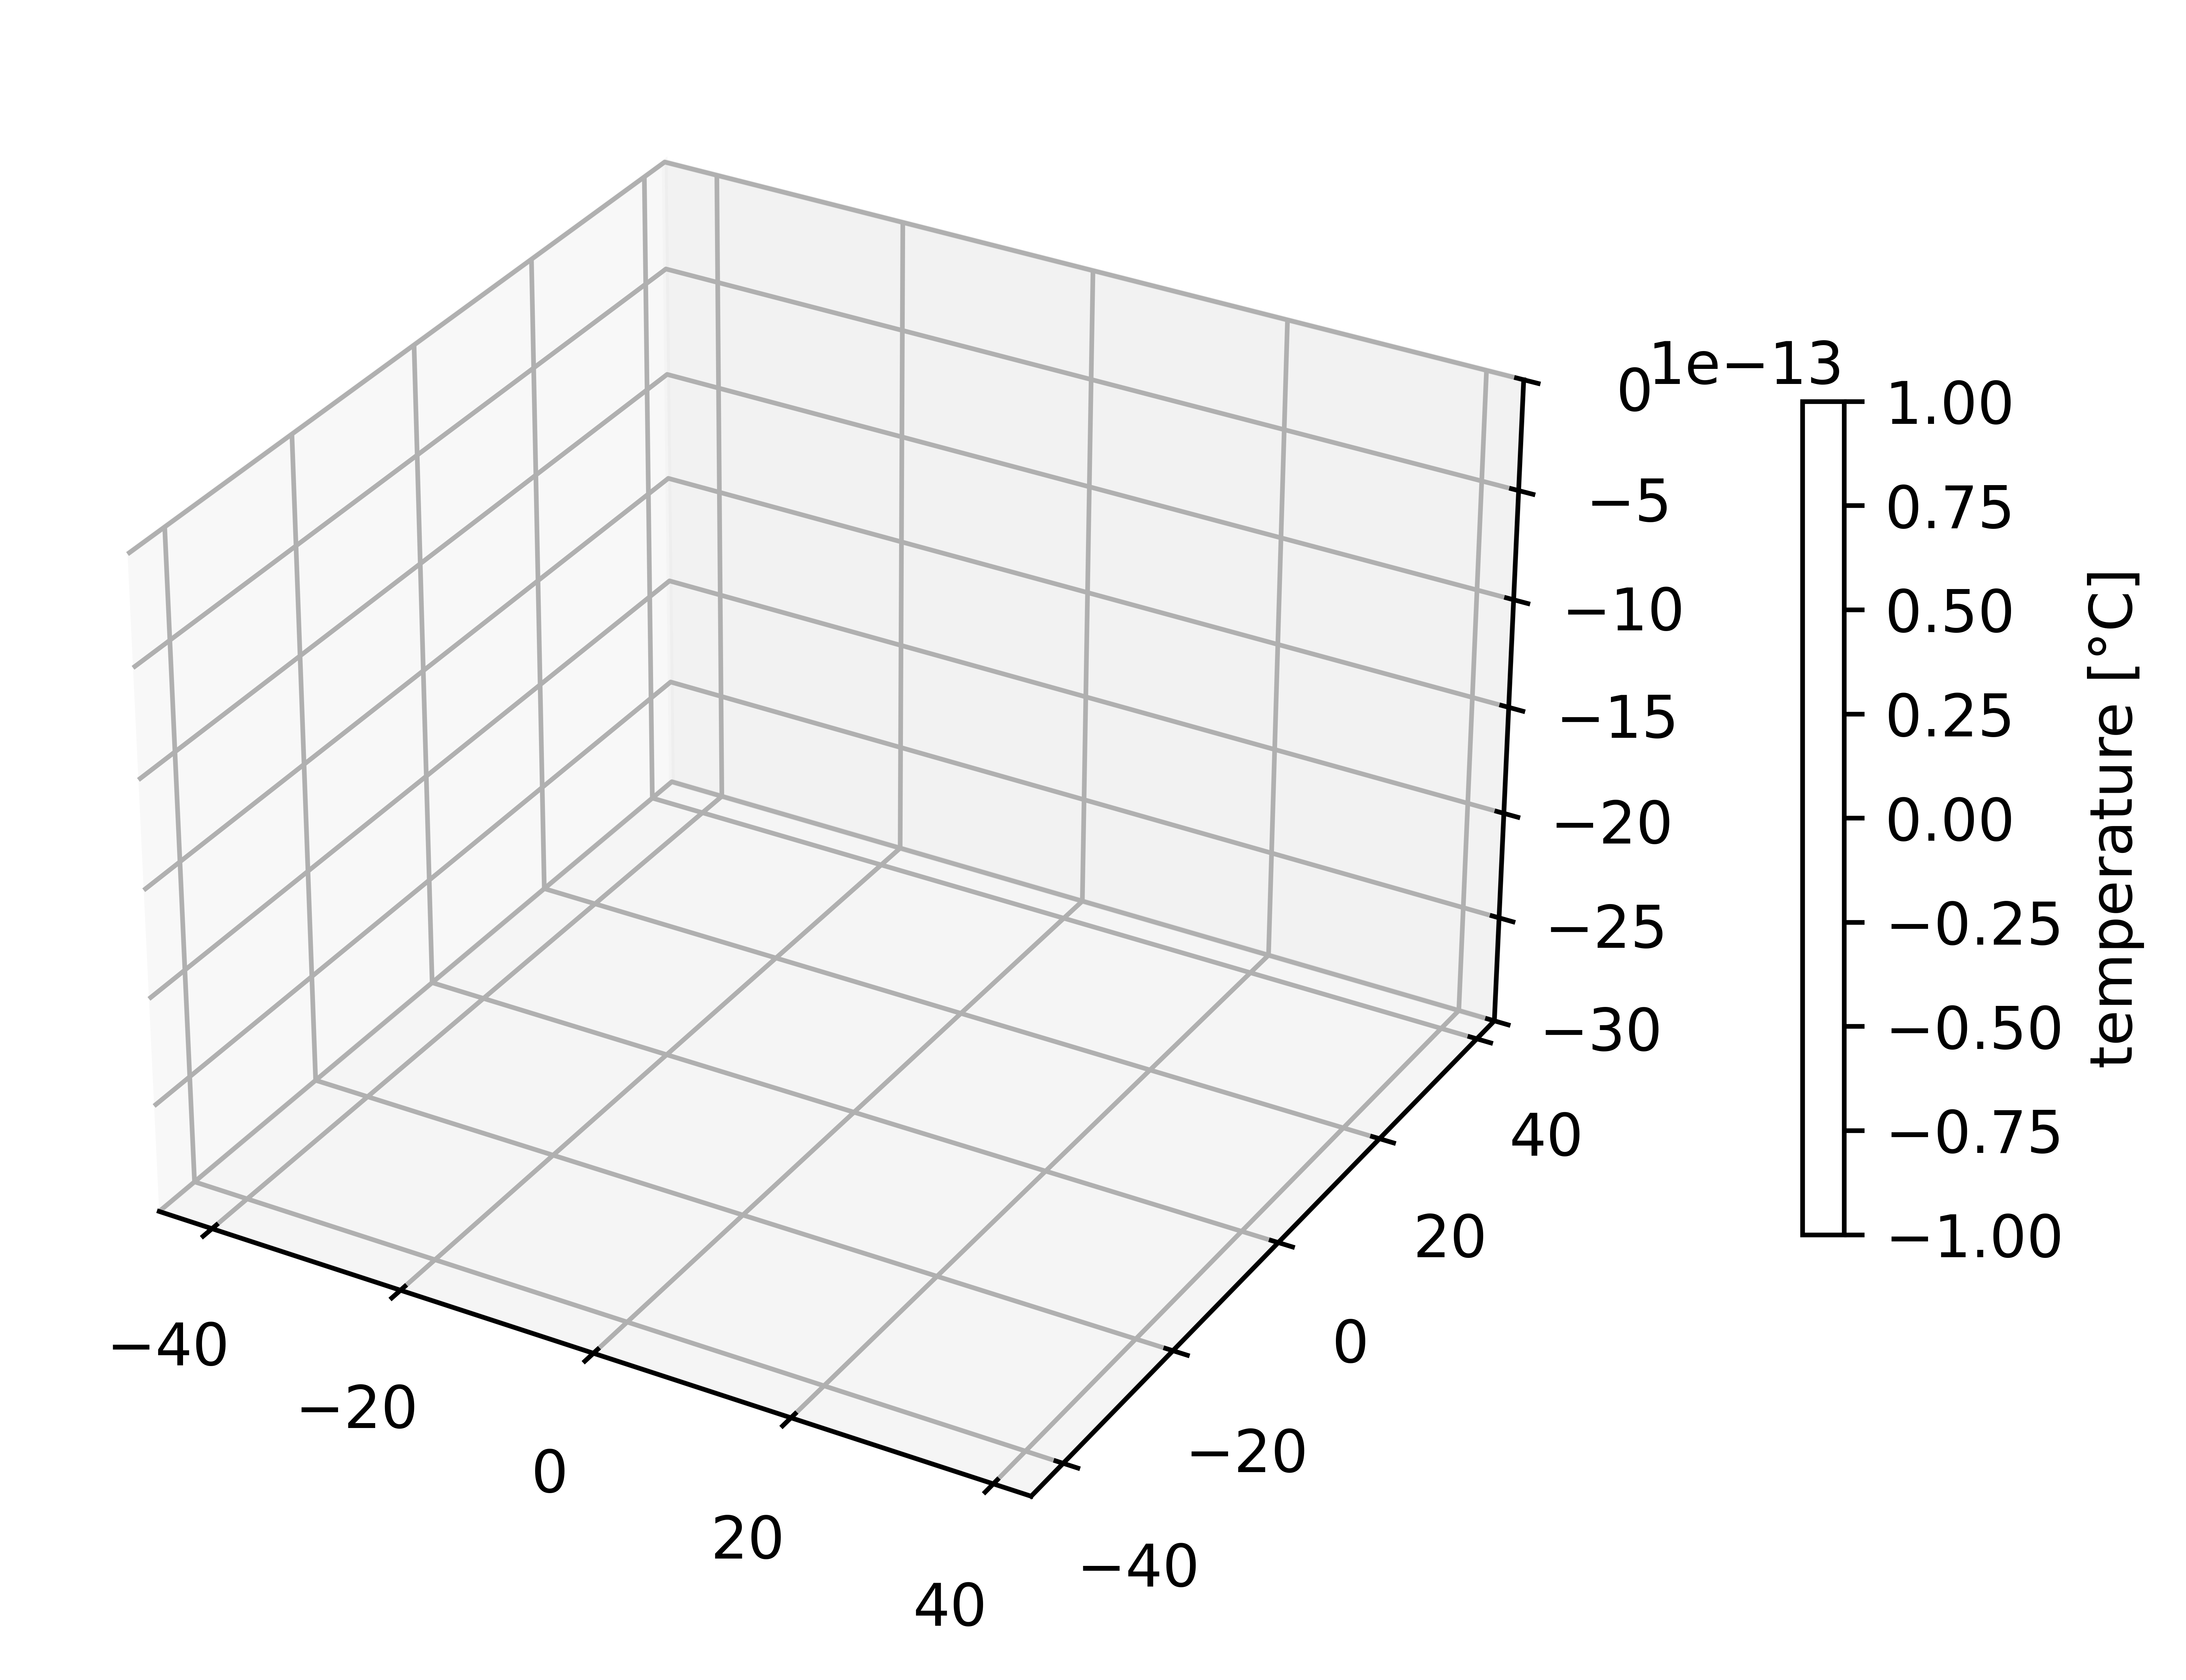

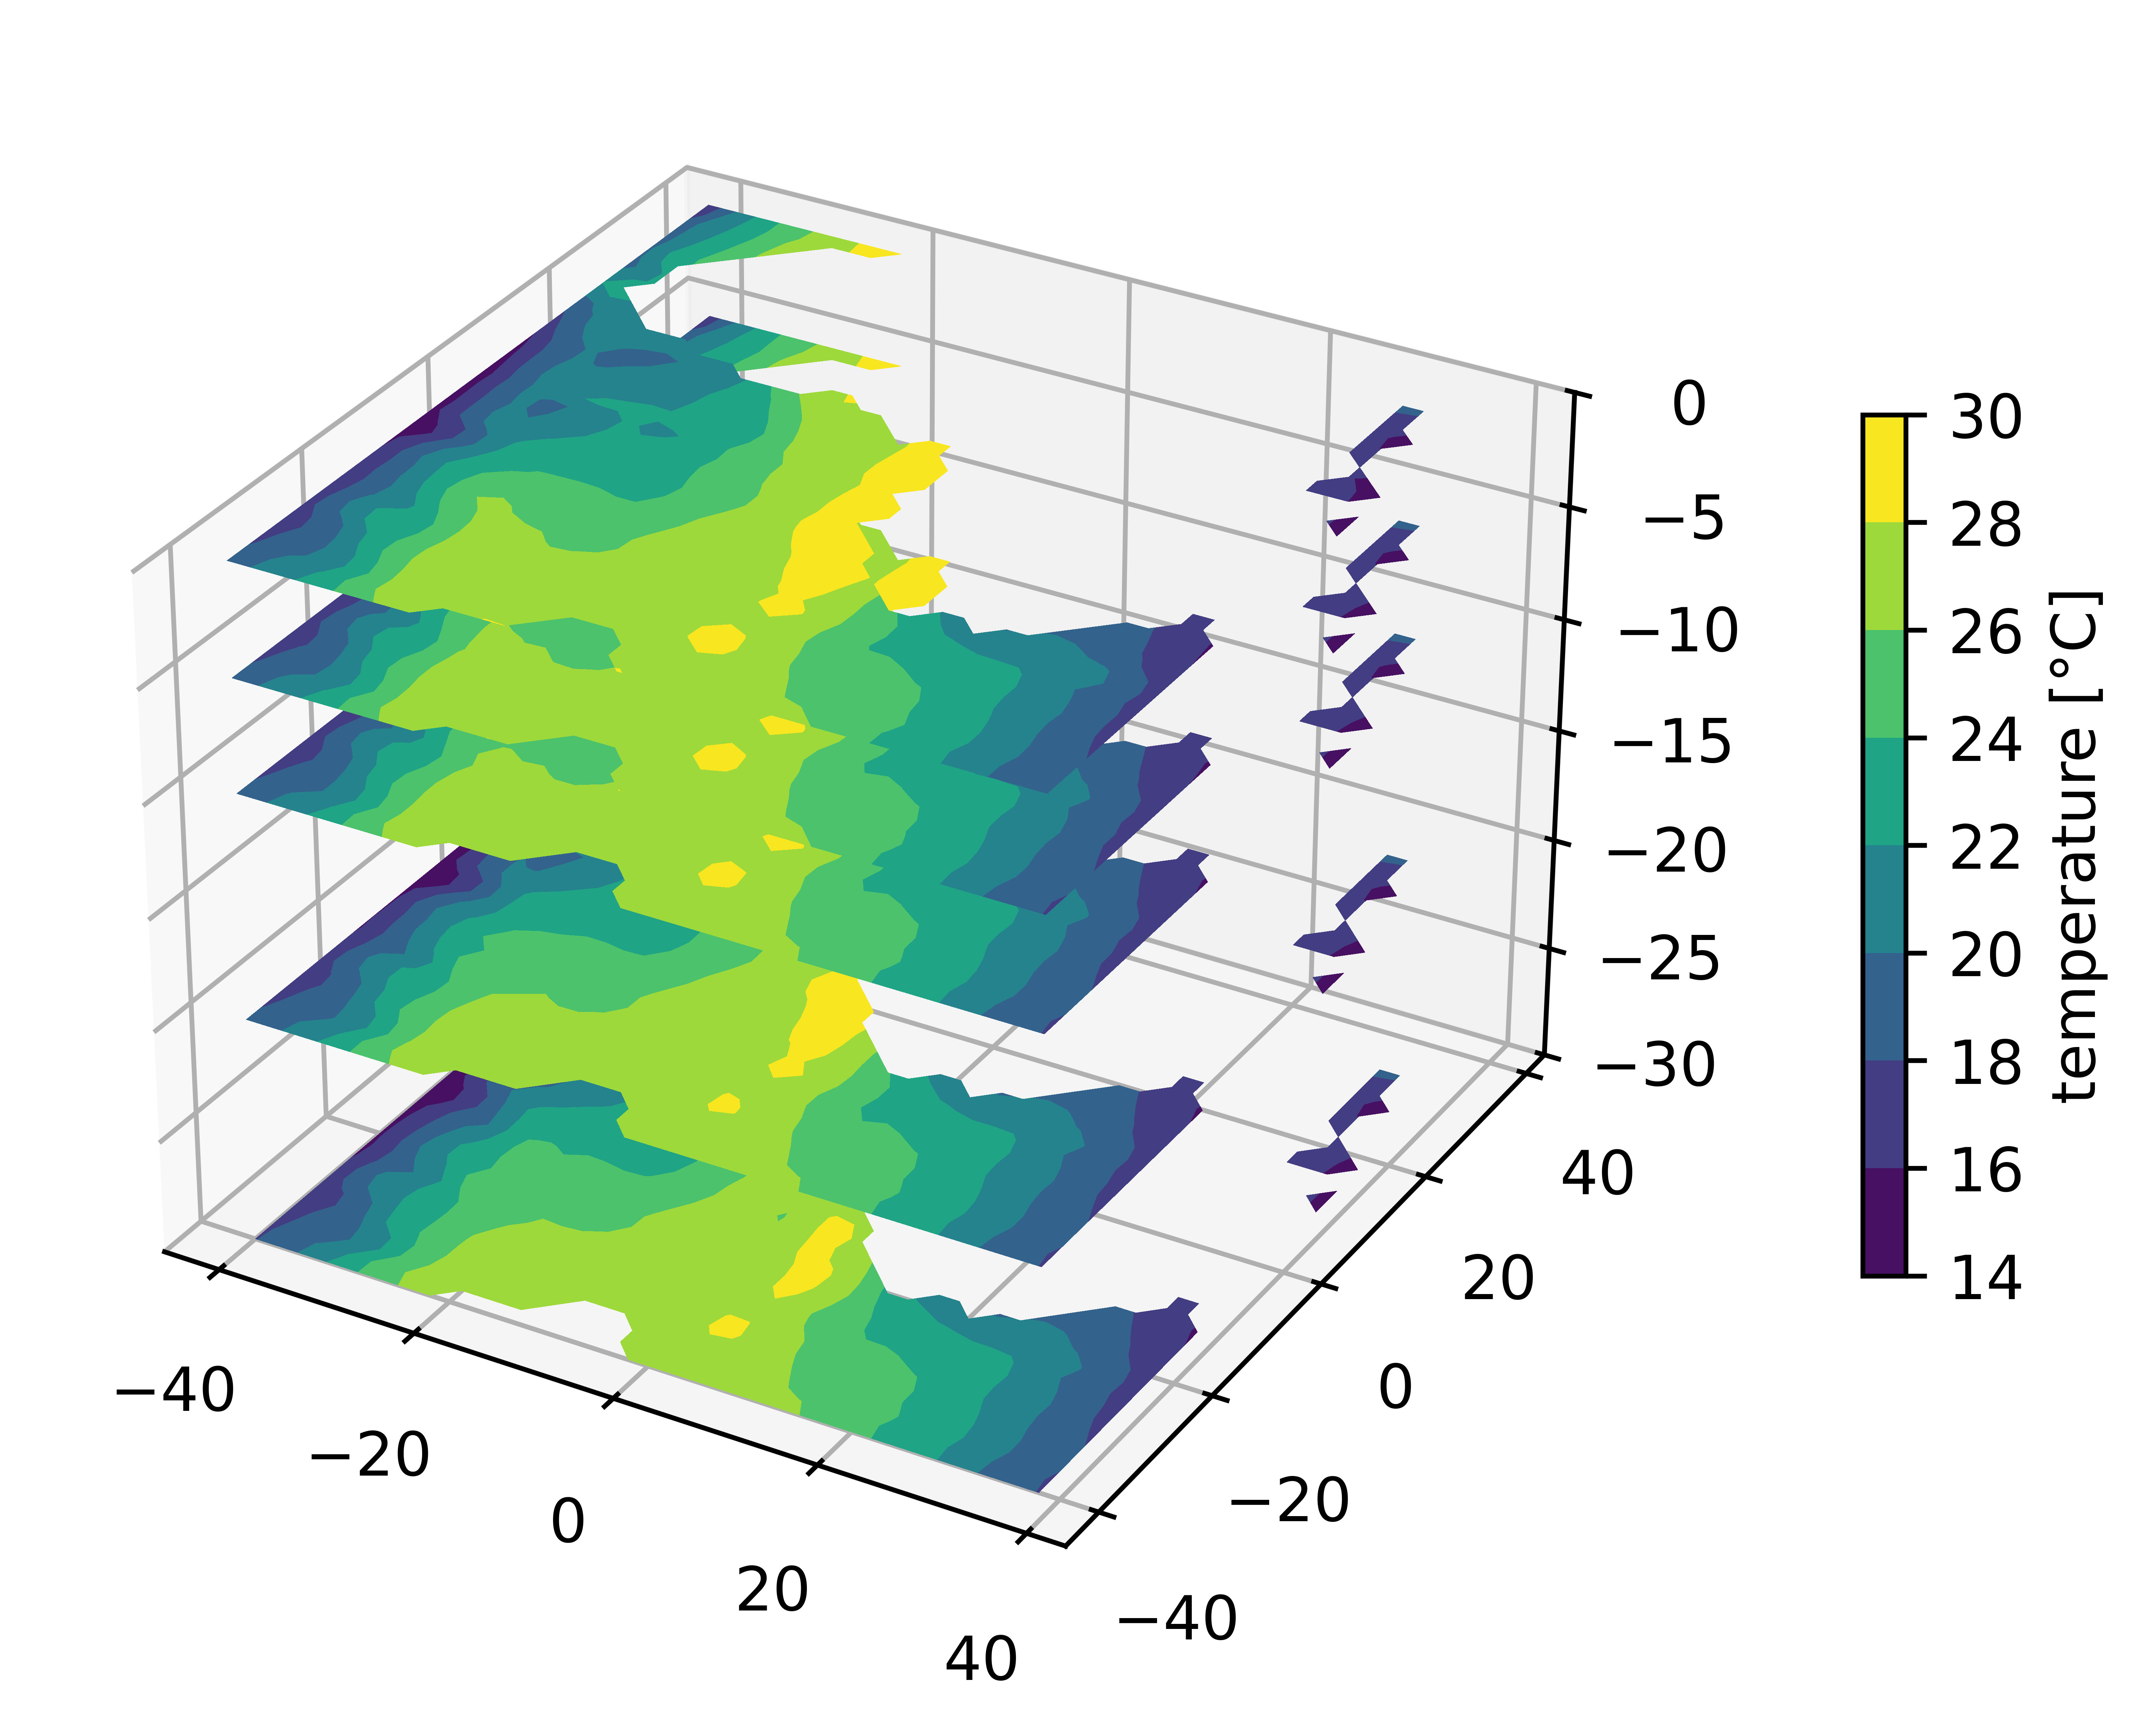

In [10]:
plot_model_prediction(temp_model, area, offset)